
Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

**Importing the dataset:**

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Understanding**

Shape of the dataset: (42935, 23)

Columns present in the dataset:
 Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Data types of columns:
 Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday       

<ipython-input-5-9d74e1ee4026>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


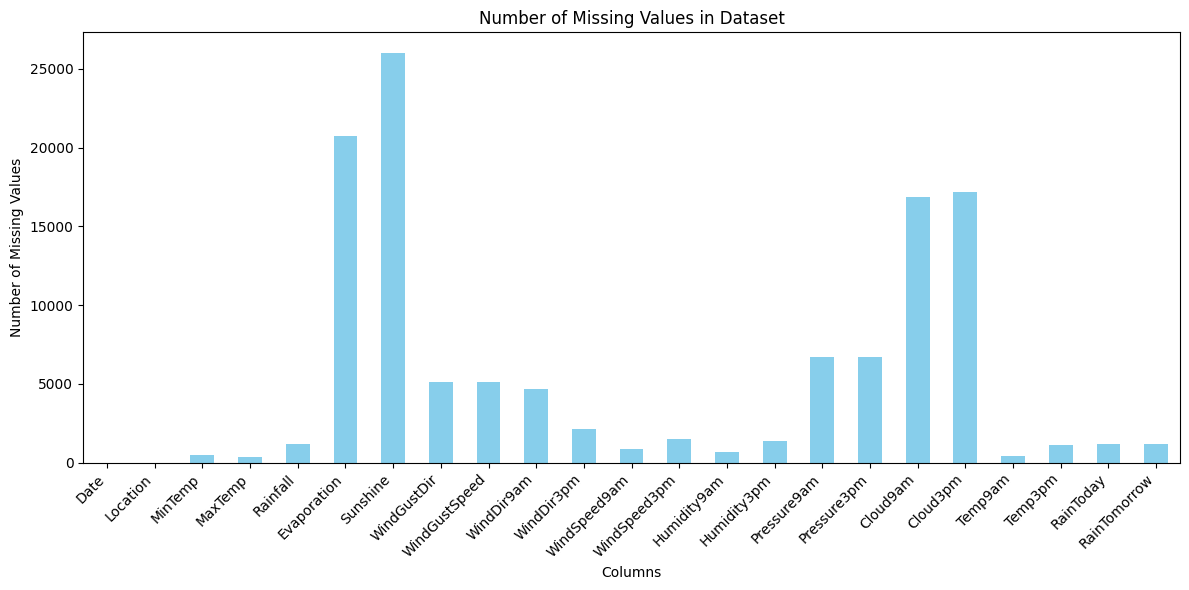

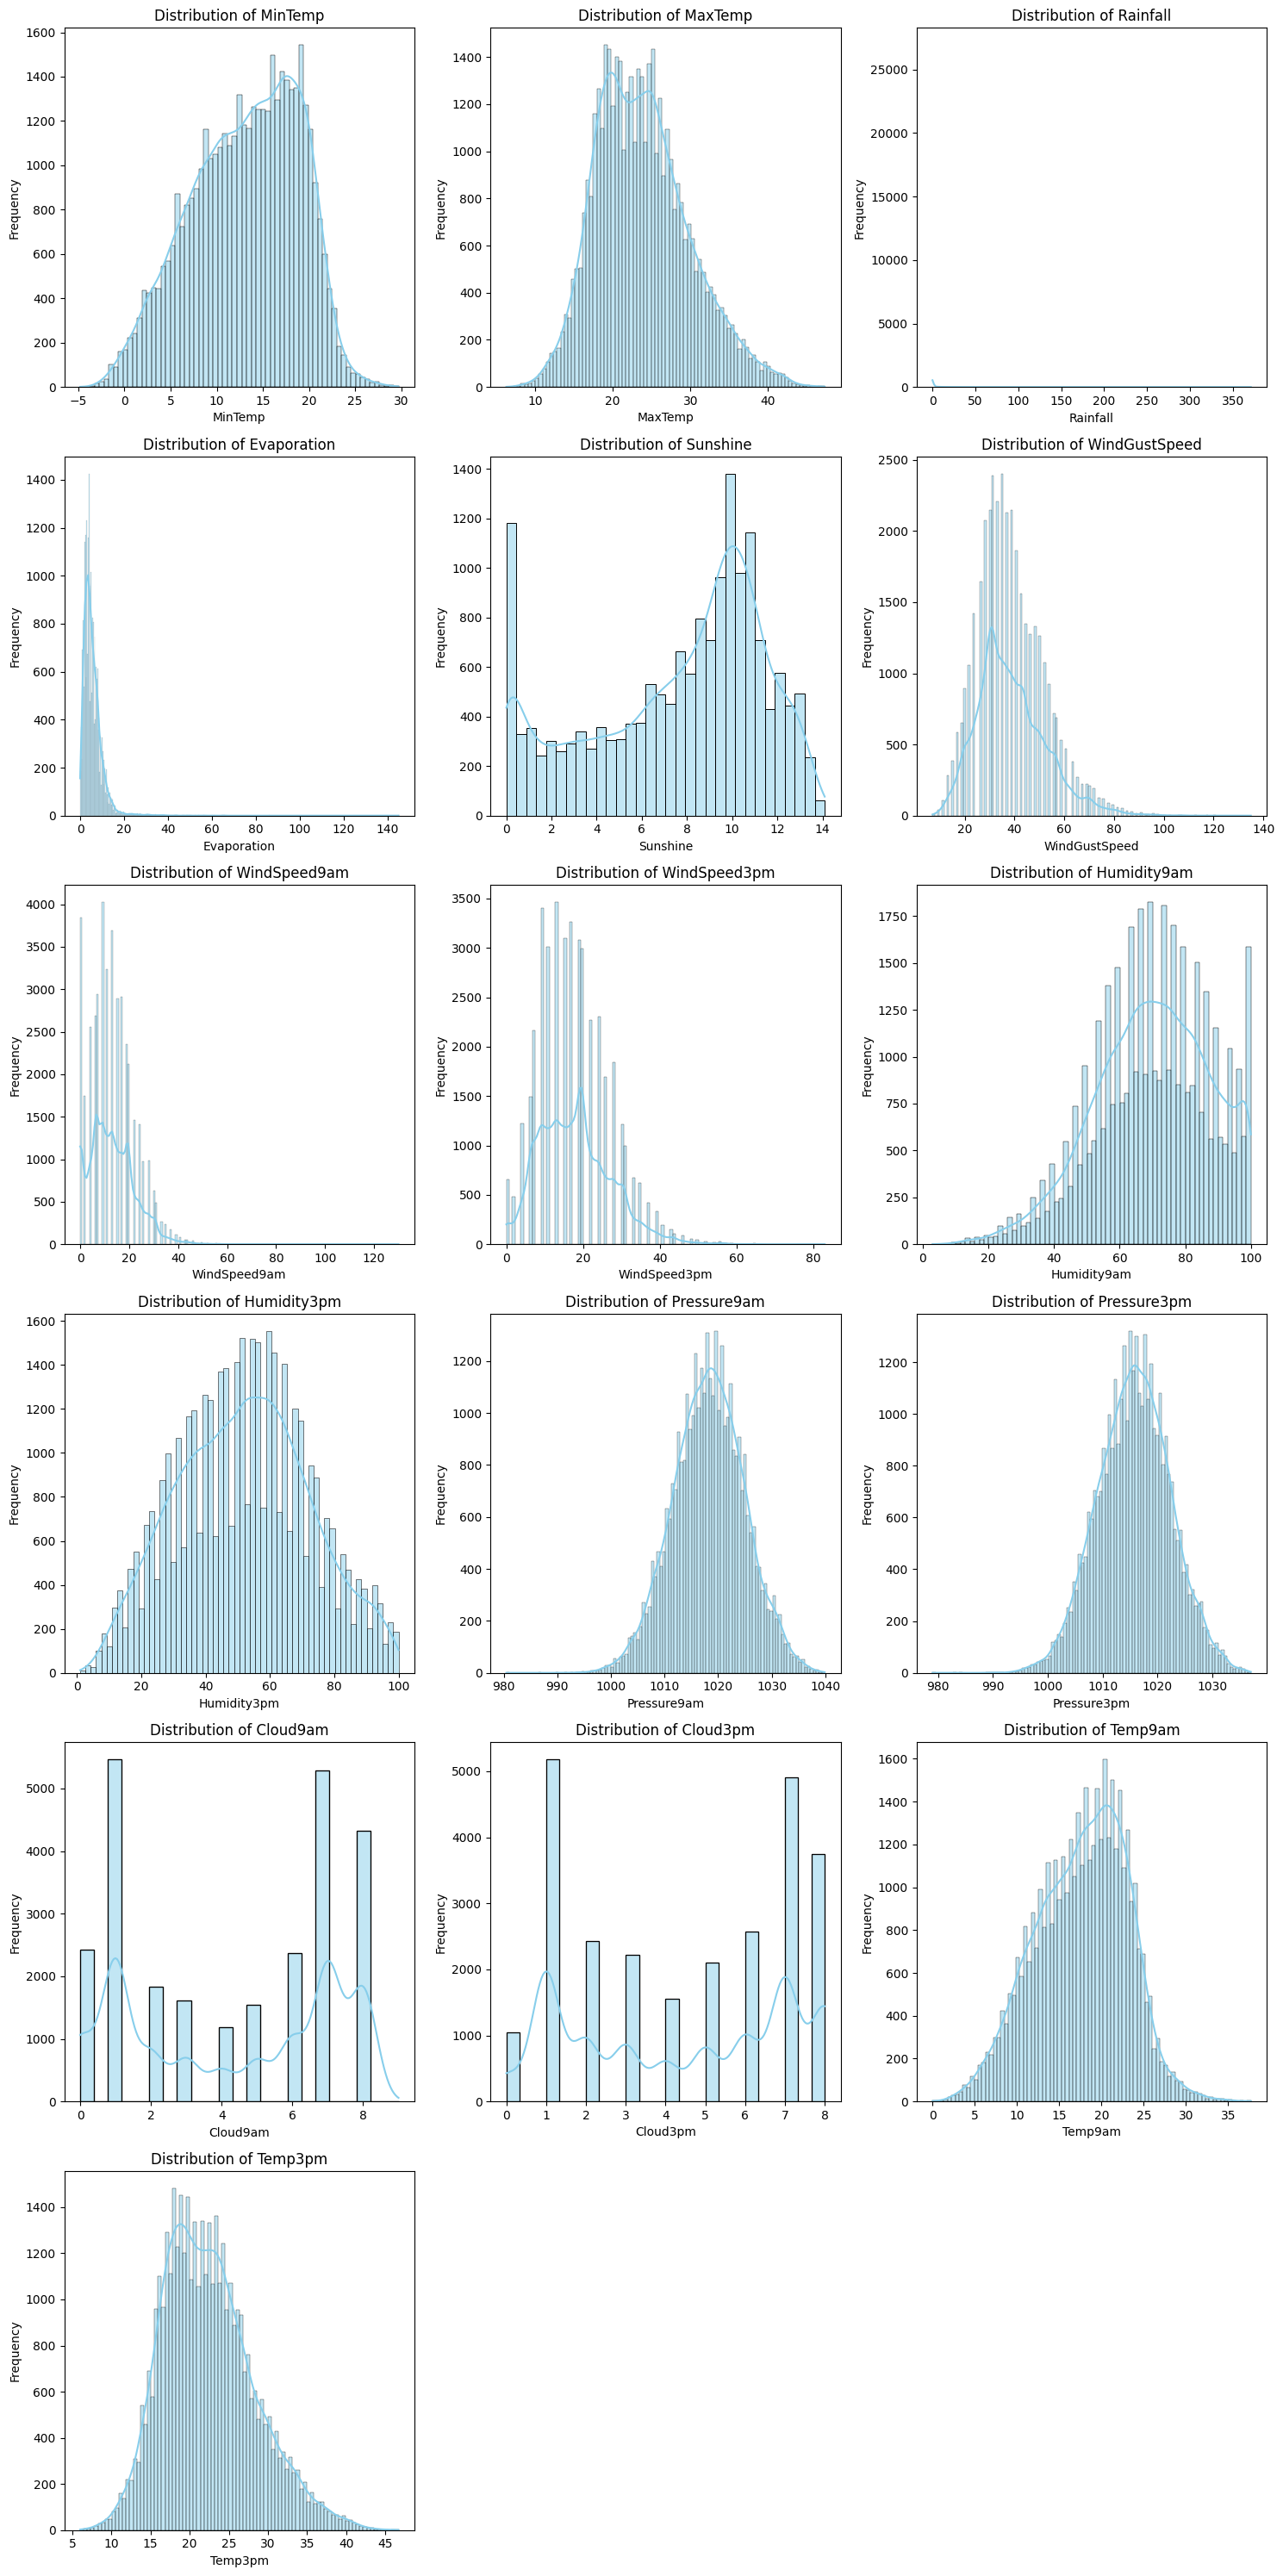

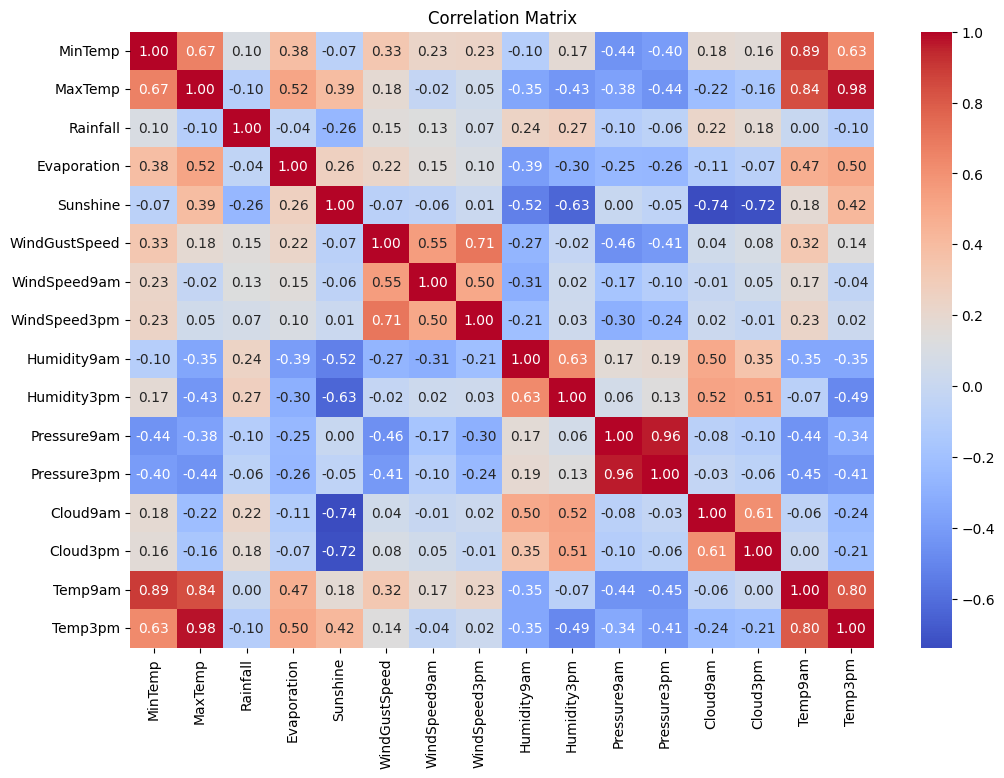

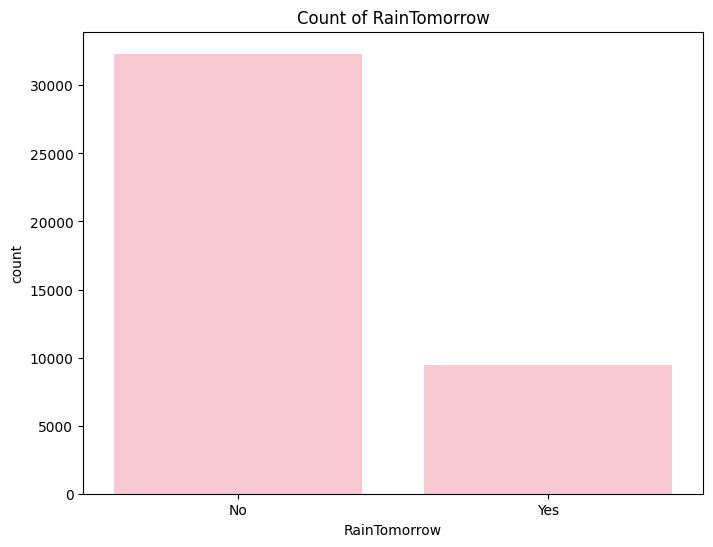

In [5]:
df = pd.read_csv("weatherAUS.csv")

# Basic information about the dataset
print("Shape of the dataset:", df.shape)
print("\nColumns present in the dataset:\n", df.columns)
print("\nData types of columns:\n", df.dtypes)
print("\nFirst few rows of the dataset:\n", df.head())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:\n", df.describe())

# Missing values in each column
print("\nMissing values in each column:\n", df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nNumber of duplicate rows:", duplicate_rows.shape[0])

# Display unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print("\nUnique values in column", col, ":", df[col].unique())

# Display correlation matrix for numerical columns
correlation_matrix = df.corr()
print("\nCorrelation matrix:\n", correlation_matrix)

# Calculate the number of missing values in each column
missing_values_count = df.isnull().sum()

# Plot the missing values count
plt.figure(figsize=(12, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of rows and columns for subplots
num_plots = len(numerical_columns)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

# Plot distribution of numerical columns
plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Count of target variable visualization with changed color to pink
plt.figure(figsize=(8, 6))
sns.countplot(x='RainTomorrow', data=df, color='pink')
plt.title("Count of RainTomorrow")
plt.show()


**Data preprocessing**

In [8]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("weatherAUS.csv")

# Drop irrelevant columns
columns_to_drop = ['Date', 'Location', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
data.drop(columns_to_drop, axis=1, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], drop_first=True)

# Convert non-numeric values in 'WindSpeed9am' to NaN
data['WindSpeed9am'] = pd.to_numeric(data['WindSpeed9am'], errors='coerce')

# Normalize numerical features
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
data[numerical_cols] = (data[numerical_cols] - data[numerical_cols].min(numeric_only=True)) / (data[numerical_cols].max(numeric_only=True) - data[numerical_cols].min(numeric_only=True))

# Print first few rows of preprocessed data
print(data.head())

# Save preprocessed data to a new CSV file
data.to_csv("weatherAUS_preprocessed.csv", index=False)

print("The preprocessed dataset is successfully stored in weatherAUS_preprocessed.csv file ")


<ipython-input-8-667ff66129de>:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("weatherAUS.csv")


    MinTemp   MaxTemp  Rainfall  WindGustSpeed WindSpeed9am  WindSpeed3pm  \
0  0.212121  0.694737  0.454139       0.569921          NaN      0.455611   
1  0.242424  0.410526  0.503356       0.411609          NaN      0.504188   
2  0.292929  0.347368  0.516779       0.556728          NaN      0.453936   
3  0.151515  0.421053  0.568233       0.459103          NaN      0.621441   
4  0.323232  0.810526  0.664430       0.678100          NaN      0.507538   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir3pm_NW  \
0     0.002667     0.439189     0.490196     0.289062  ...              0   
1     0.000000     0.495495     0.497549     0.289062  ...              0   
2     0.000000     0.470721     0.590686     0.304688  ...              0   
3     0.000000     0.545045     0.519608     0.132812  ...              0   
4     0.004444     0.617117     0.512255     0.265625  ...              1   

   WindDir3pm_S WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_

**Logistic Regression**

Accuracy: 0.8394982309424253


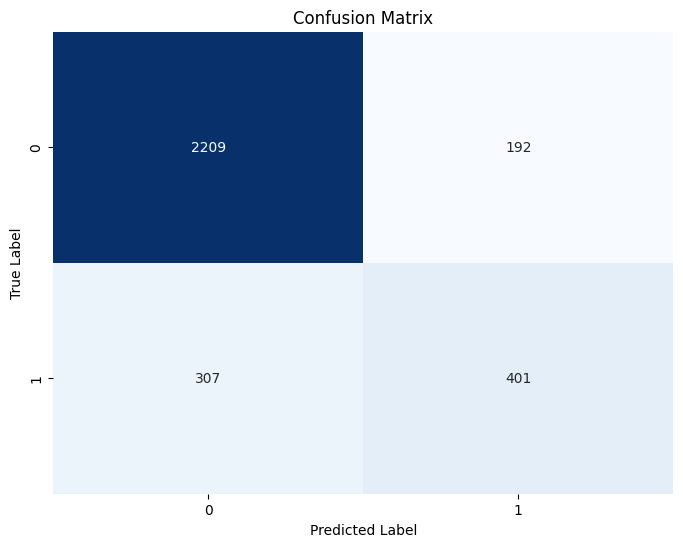

Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.92      0.90      2401
         Yes       0.68      0.57      0.62       708

    accuracy                           0.84      3109
   macro avg       0.78      0.74      0.76      3109
weighted avg       0.83      0.84      0.83      3109



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Load the dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Suppress DtypeWarning
    data = pd.read_csv("weatherAUS.csv")

# Drop rows with missing values
data = data.dropna()

# Select features and target variable
X = data.drop(['RainTomorrow', 'Date'], axis=1)  # Excluding Date column as it's not relevant for prediction
y = data['RainTomorrow']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter

# Train the model
model.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


 **Naïve Bayes classifier**

Accuracy: 0.3319395303956256


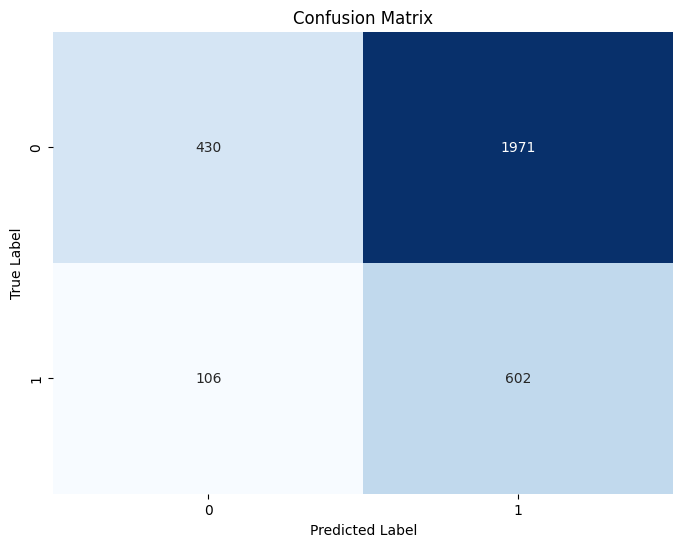

Classification Report:
               precision    recall  f1-score   support

          No       0.80      0.18      0.29      2401
         Yes       0.23      0.85      0.37       708

    accuracy                           0.33      3109
   macro avg       0.52      0.51      0.33      3109
weighted avg       0.67      0.33      0.31      3109



In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Load the dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Suppress DtypeWarning
    data = pd.read_csv("weatherAUS.csv")

# Drop rows with missing values
data = data.dropna()

# Select features and target variable
X = data.drop(['RainTomorrow', 'Date'], axis=1)  # Excluding Date column as it's not relevant for prediction
y = data['RainTomorrow']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (not necessary for Naive Bayes, but can be done)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Naive Bayes classifier (GaussianNB assumes Gaussian distribution for numerical features)
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = nb_classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


**Classification model training and Result analysis**

<ipython-input-11-36bb8c83b6eb>:47: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("weatherAUS.csv")


Logistic Regression Performance:
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.92      0.90      2401
         Yes       0.68      0.57      0.62       708

    accuracy                           0.84      3109
   macro avg       0.78      0.74      0.76      3109
weighted avg       0.83      0.84      0.83      3109



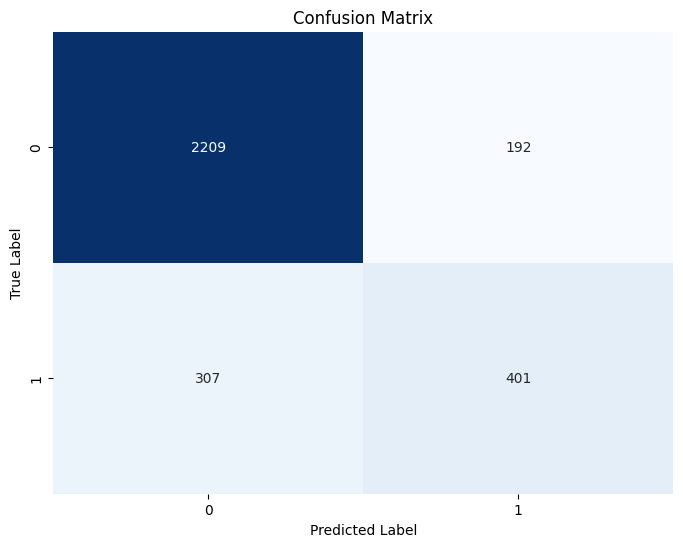

Specificity: 0.920033319450229
Naive Bayes Performance:
Classification Report:
               precision    recall  f1-score   support

          No       0.80      0.18      0.29      2401
         Yes       0.23      0.85      0.37       708

    accuracy                           0.33      3109
   macro avg       0.52      0.51      0.33      3109
weighted avg       0.67      0.33      0.31      3109



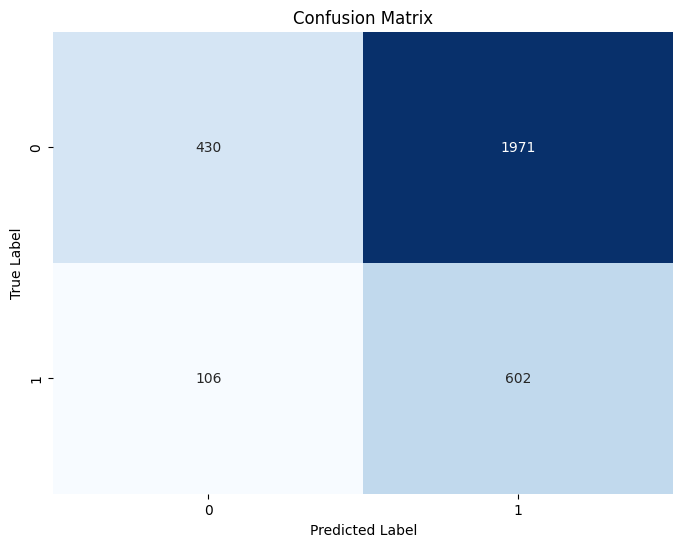

Specificity: 0.1790920449812578


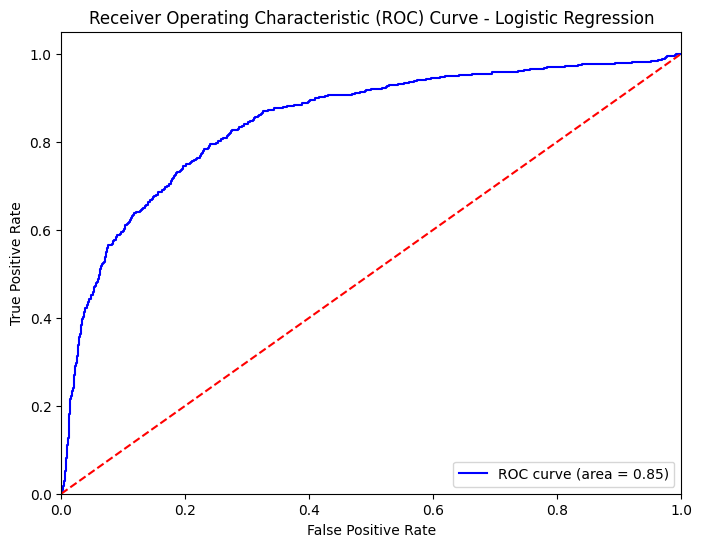

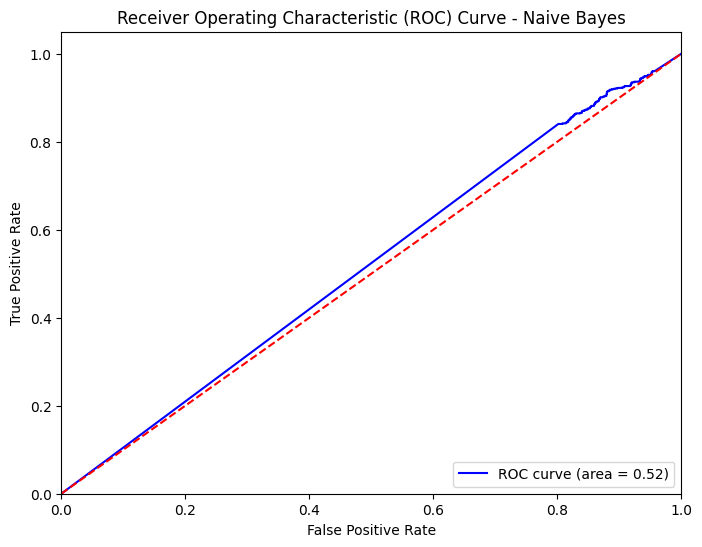

Logistic Regression Cross Validation Scores:
[0.82589465 0.83393647 0.82227583 0.82106956 0.83386967]
Mean CV Score: 0.8274092376091801
Naive Bayes Cross Validation Scores:
[0.32127061 0.29714515 0.32127061 0.32207479 0.30933226]
Mean CV Score: 0.3142186837362814
Logistic Regression Training Accuracy: 0.8647257519704037
Logistic Regression Test Accuracy: 0.8394982309424253
Naive Bayes Training Accuracy: 0.36922953192858293
Naive Bayes Test Accuracy: 0.3319395303956256
Best Parameters for Logistic Regression: {'C': 0.01}


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Function to visualize confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Function to display performance metrics
def display_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test)
    # Specificity = TN / (TN + FP)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    print("Specificity:", specificity)

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - ' + model_name)
    plt.legend(loc="lower right")
    plt.show()

# Load the dataset
data = pd.read_csv("weatherAUS.csv")

# Drop rows with missing values
data = data.dropna()

# Select features and target variable
X = data.drop(['RainTomorrow', 'Date'], axis=1)  # Excluding Date column as it's not relevant for prediction
y = data['RainTomorrow']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (not necessary for Naive Bayes, but can be done for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
naive_bayes_model = GaussianNB()

# Fit the models
logistic_model.fit(X_train_scaled, y_train)
naive_bayes_model.fit(X_train, y_train)

# Display performance metrics for Logistic Regression
print("Logistic Regression Performance:")
display_metrics(logistic_model, X_test_scaled, y_test)

# Display performance metrics for Naive Bayes
print("Naive Bayes Performance:")
display_metrics(naive_bayes_model, X_test, y_test)

# Convert target variable to binary numeric values
y_test_binary = y_test.replace({'Yes': 1, 'No': 0})

# Plot ROC curve for Logistic Regression
plot_roc_curve(logistic_model, X_test_scaled, y_test_binary, "Logistic Regression")

# Plot ROC curve for Naive Bayes
plot_roc_curve(naive_bayes_model, X_test, y_test_binary, "Naive Bayes")

# Perform k-fold cross validation
print("Logistic Regression Cross Validation Scores:")
cv_scores_lr = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(cv_scores_lr)
print("Mean CV Score:", cv_scores_lr.mean())

print("Naive Bayes Cross Validation Scores:")
cv_scores_nb = cross_val_score(naive_bayes_model, X_train, y_train, cv=5, scoring='accuracy')
print(cv_scores_nb)
print("Mean CV Score:", cv_scores_nb.mean())

# Check for overfitting/underfitting by comparing training and test accuracy
train_accuracy_lr = logistic_model.score(X_train_scaled, y_train)
test_accuracy_lr = logistic_model.score(X_test_scaled, y_test)
print("Logistic Regression Training Accuracy:", train_accuracy_lr)
print("Logistic Regression Test Accuracy:", test_accuracy_lr)

train_accuracy_nb = naive_bayes_model.score(X_train, y_train)
test_accuracy_nb = naive_bayes_model.score(X_test, y_test)
print("Naive Bayes Training Accuracy:", train_accuracy_nb)
print("Naive Bayes Test Accuracy:", test_accuracy_nb)

# Hyperparameter tuning using GridSearchCV for Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_scaled, y_train)
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)

# Commenting out GridSearchCV for Naive Bayes as it doesn't have tunable hyperparameters

# Display best parameters
# print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)
